<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, to explore the effect of different features on the price of laptops. 


# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


In [67]:
import piplite
await piplite.install('seaborn')

ModuleNotFoundError: No module named 'piplite'

In [ ]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


The functions below will download the dataset into your browser:


In [69]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

ModuleNotFoundError: No module named 'pyodide'

In [70]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [71]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

NameError: name 'download' is not defined

Import the file to a pandas dataframe.


In [72]:
df = pd.read_csv(file_name, header=0)

NameError: name 'file_name' is not defined

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface. While working on the downloaded version of this notebook on their local machines, the learners can simply **skip the steps above**, and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [73]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=None)

In [74]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
1,0.0,0,Acer,4,2,1,5,14.0,0.5517241379310345,8,256,3.5280000000000005,978,Low,0,1
2,1.0,1,Dell,3,1,1,3,15.600000000000001,0.6896551724137931,4,256,4.851000000000001,634,Low,1,0
3,2.0,2,Dell,3,1,1,7,15.600000000000001,0.9310344827586208,8,256,4.851000000000001,946,Low,1,0
4,3.0,3,Dell,4,2,1,5,13.299999999999999,0.5517241379310345,8,128,2.6901,1244,Low,0,1


Print the first 5 entries of the dataset to confirm loading.


In [75]:
new_header = df.iloc[0]  # The first row is the new header
df = df[1:]  # Take the data less the header row
df.columns = new_header  # Set the header row as the DataFrame's header

# Reset index if needed
df.reset_index(drop=True, inplace=True)

In [76]:
df.head(5)

,NaN,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0.0,0,Acer,4,2,1,5,14.0,0.5517241379310345,8,256,3.5280000000000005,978,Low,0,1
1,1.0,1,Dell,3,1,1,3,15.600000000000001,0.6896551724137931,4,256,4.851000000000001,634,Low,1,0
2,2.0,2,Dell,3,1,1,7,15.600000000000001,0.9310344827586208,8,256,4.851000000000001,946,Low,1,0
3,3.0,3,Dell,4,2,1,5,13.299999999999999,0.5517241379310345,8,128,2.6901,1244,Low,0,1
4,4.0,4,HP,4,2,1,7,15.600000000000001,0.6206896551724138,8,256,4.21155,837,Low,1,0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


In [77]:
print(df.dtypes)



0
NaN                 float64
Unnamed: 0           object
Manufacturer         object
Category             object
GPU                  object
OS                   object
CPU_core             object
Screen_Size_inch     object
CPU_frequency        object
RAM_GB               object
Storage_GB_SSD       object
Weight_pounds        object
Price                object
Price-binned         object
Screen-Full_HD       object
Screen-IPS_panel     object
dtype: object


In [78]:
df['CPU_frequency'] = pd.to_numeric(df['CPU_frequency'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Screen_Size_inch'] = pd.to_numeric(df['Screen_Size_inch'], errors='coerce')
df['RAM_GB'] = pd.to_numeric(df['RAM_GB'], errors='coerce')
df['Weight_pounds'] = pd.to_numeric(df['Weight_pounds'], errors='coerce')
df['Storage_GB_SSD'] = pd.to_numeric(df['Storage_GB_SSD'], errors='coerce')


(0.0, 3974.15)

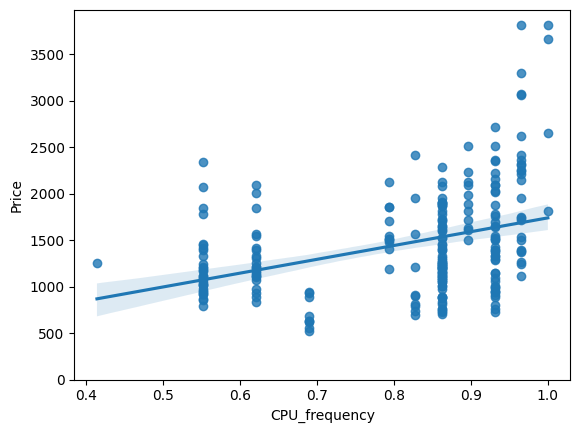

In [79]:
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

<Axes: xlabel='CPU_frequency', ylabel='Price'>

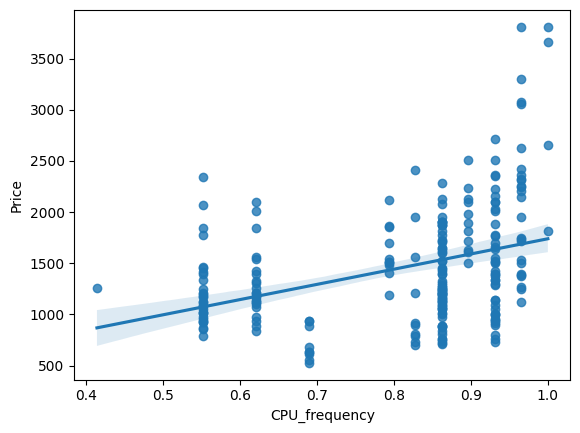

In [80]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='CPU_frequency',y='Price',data= df)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
```

</details>


<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

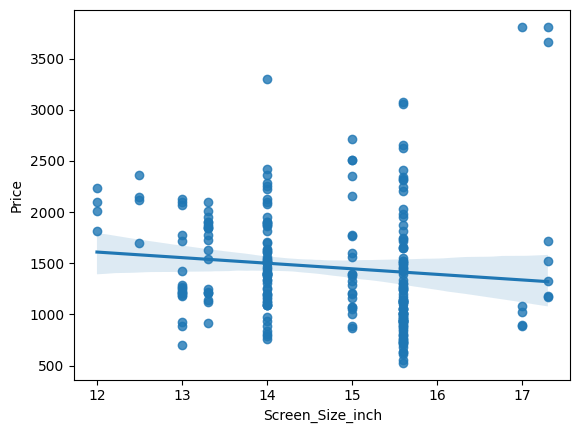

In [81]:
# Write your code below and press Shift+Enter to execute
# Screen_Size_inch plot
sns.regplot(x='Screen_Size_inch',y='Price',data = df)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
```

</details>


<Axes: xlabel='Weight_pounds', ylabel='Price'>

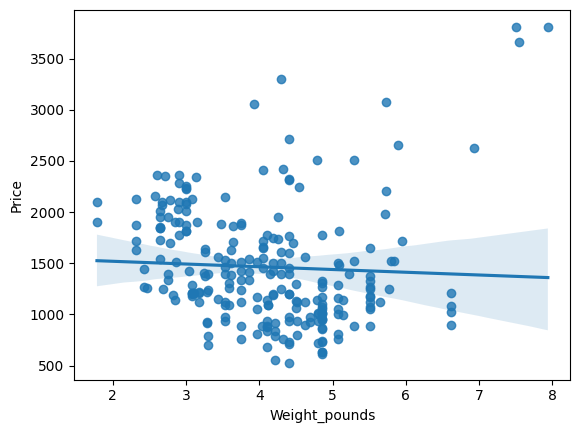

In [82]:
# Write your code below and press Shift+Enter to execute
# Weight_pounds plot
sns.regplot(x='Weight_pounds',y='Price',data=df)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
```

</details>


In [83]:
# Correlation values of the three attributes with Price
pear1,p1 = stats.pearsonr(df['CPU_frequency'],df['Price'])
pear2,p2 = stats.pearsonr(df['Screen_Size_inch'],df['Price'])
pear3,p3 = stats.pearsonr(df['Weight_pounds'],df['Price'])
print(f'Pearson Coeff for CPU_frequency and Price is {pear1} with sign prob of {p1}\n')
print(f'Pearson Coeff for Screen_Size_inch and Price is {pear2} with sign prob of {p2}\n')
print(f'Pearson Coeff for Weight_pounds and Price is {pear3} with sign prob of {p3}')

Pearson Coeff for CPU_frequency and Price is 0.36666555892588615 with sign prob of 5.502463350713219e-09

Pearson Coeff for Screen_Size_inch and Price is -0.11064420817118273 with sign prob of 0.0885339784683062

Pearson Coeff for Weight_pounds and Price is -0.05031225837751551 with sign prob of 0.43976938534338894


<details>
    <summary>Click here for Solution</summary>

```python
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())
```

</details>


In [84]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())


Correlation of Price and CPU_frequency is  0              CPU_frequency     Price
0                                     
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is  0                 Screen_Size_inch     Price
0                                           
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is  0              Weight_pounds     Price
0                                     
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


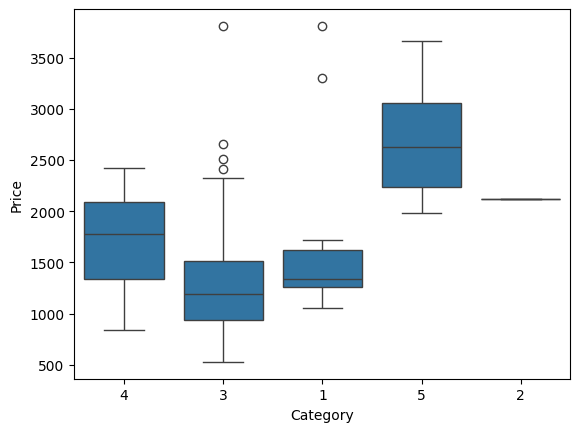

In [85]:
# Write your code below and press Shift+Enter to execute
# Category Box plot
#features = ["Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"]
features = ["Category"]
for feature in features:
    sns.boxplot(x=feature, y='Price', data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Category", y="Price", data=df)
```

</details>


In [86]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot


<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="GPU", y="Price", data=df)
```

</details>


<Axes: xlabel='GPU', ylabel='Price'>

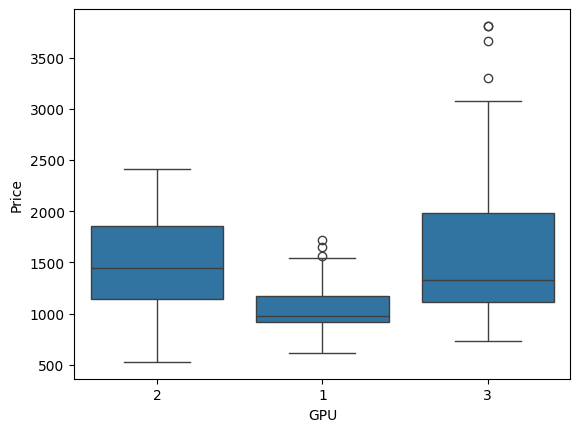

In [87]:
# Write your code below and press Shift+Enter to execute
# OS Box plot
sns.boxplot(x='GPU', y='Price', data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="OS", y="Price", data=df)
```

</details>


In [88]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="CPU_core", y="Price", data=df)
```

</details>


<Axes: xlabel='RAM_GB', ylabel='Price'>

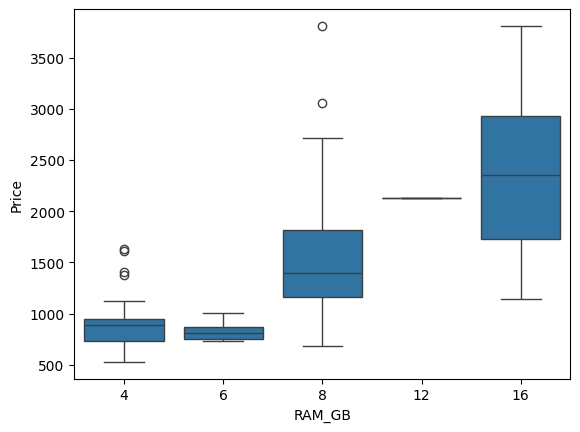

In [89]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot
sns.boxplot(x='RAM_GB', y='Price', data=df)

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="RAM_GB", y="Price", data=df)
```

</details>


In [90]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
```

</details>


# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [91]:
# Write your code below and press Shift+Enter to execute
print(df.describe())
print(df.describe(include=['object']))

0             NaN  Screen_Size_inch  CPU_frequency      RAM_GB  \
count  238.000000        238.000000     238.000000  238.000000   
mean   118.500000         14.688655       0.813822    7.882353   
std     68.848868          1.166045       0.141860    2.482603   
min      0.000000         12.000000       0.413793    4.000000   
25%     59.250000         14.000000       0.689655    8.000000   
50%    118.500000         15.000000       0.862069    8.000000   
75%    177.750000         15.600000       0.931034    8.000000   
max    237.000000         17.300000       1.000000   16.000000   

0      Storage_GB_SSD  Weight_pounds        Price  
count      238.000000     238.000000   238.000000  
mean       245.781513       4.106221  1462.344538  
std         34.765316       1.078442   574.607699  
min        128.000000       1.786050   527.000000  
25%        256.000000       3.246863  1066.500000  
50%        256.000000       4.106221  1333.000000  
75%        256.000000       4.851000  177

<details>
<summary>Click here for Solution</summary>

```python
print(df.describe())
print(df.describe(include=['object']))
```

</details>


In [92]:

df.describe(include=['object'])

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238,238,238,238,238,238,238,238,238
unique,238,11,5,3,2,3,3,2,2
top,0,Dell,3,2,1,5,Low,1,0
freq,1,71,154,136,224,123,160,161,161


In [93]:
df.describe(include='object')

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238,238,238,238,238,238,238,238,238
unique,238,11,5,3,2,3,3,2,2
top,0,Dell,3,2,1,5,Low,1,0
freq,1,71,154,136,224,123,160,161,161


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [94]:
# Write your code below and press Shift+Enter to execute
# Create the group
df.groupby(['GPU','CPU_core'])['Price'].mean()

GPU  CPU_core
1    3            769.250000
     5            998.500000
     7           1167.941176
2    3            785.076923
     5           1462.197674
     7           1744.621622
3    3            784.000000
     5           1220.680000
     7           1945.097561
Name: Price, dtype: float64

<details>
<summary>Click here for Solution</summary>

```python
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
```

</details>


In [103]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core']).mean()
print(grouped_test1)

0                   Price
GPU CPU_core             
1   3          769.250000
    5          998.500000
    7         1167.941176
2   3          785.076923
    5         1462.197674
    7         1744.621622
3   3          784.000000
    5         1220.680000
    7         1945.097561


In [102]:
grouped_test1.pivot(index='GPU',columns='CPU_core',values='Price')

CPU_core,3,5,7
GPU,,,
1,769.250000,998.500000,1167.941176
2,785.076923,1462.197674,1744.621622
3,784.000000,1220.680000,1945.097561


In [101]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table
df.pivot(index='GPU',columns='CPU_core',values='Price')

ValueError: Index contains duplicate entries, cannot reshape

In [100]:
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

0              Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


<details>
<summary>Click here for Solution</summary>

```python
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)
```

</details>


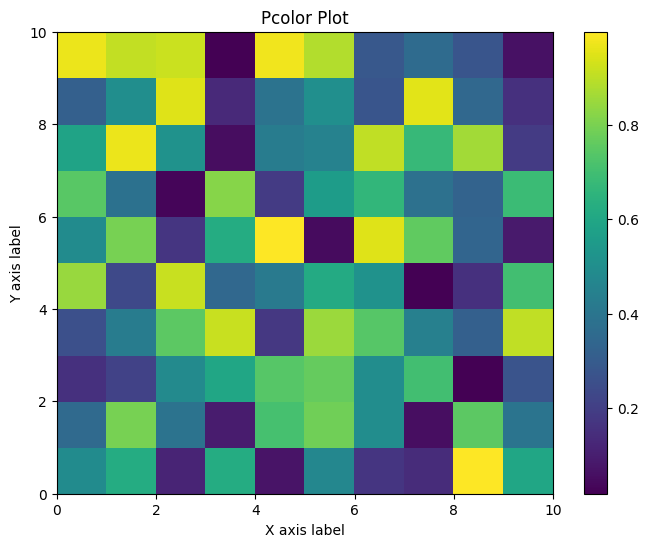

In [104]:
# Create sample data
data = np.random.rand(10, 10)  # 10x10 matrix of random values

# Create the plot
plt.figure(figsize=(8, 6))
plt.pcolor(data, cmap='viridis')  # You can change the colormap with cmap
plt.colorbar()  # Add a colorbar to show the color scale

# Add labels and title (optional)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('Pcolor Plot')

# Show the plot
plt.show()

In [110]:
grouped_pivot

0              Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

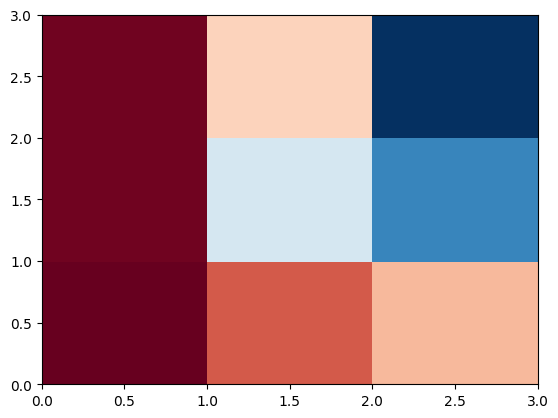

In [108]:
plt.pcolor(grouped_pivot, cmap='RdBu')

In [111]:
grouped_test1

0                   Price
GPU CPU_core             
1   3          769.250000
    5          998.500000
    7         1167.941176
2   3          785.076923
    5         1462.197674
    7         1744.621622
3   3          784.000000
    5         1220.680000
    7         1945.097561

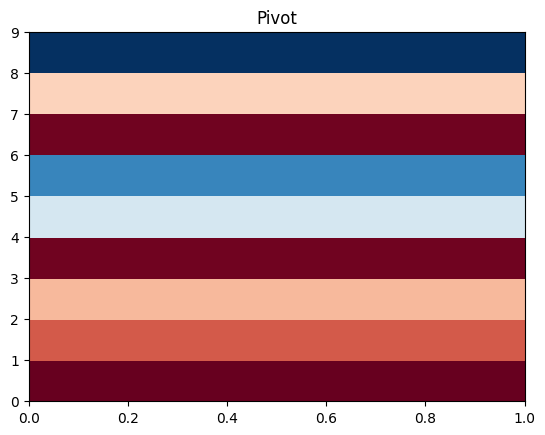

In [109]:
# Write your code below and press Shift+Enter to execute
# Create the Plot
plt.pcolor(grouped_test1, cmap='RdBu')
plt.title('Pivot')
plt.show()


<details>
<summary>Click here for Solution</summary>

```python
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
```

</details>


# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [107]:
# Write your code below and press Shift+Enter to execute
df['CPU_core'] = pd.to_numeric(df['CPU_core'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
pear , p = stats.pearsonr(df['CPU_core'],df['Price'])
print(f'pearson coeff is {pear} with probablity of {p}')

pearson coeff is 0.4593977773355115 with probablity of 7.912950127009359e-14


<details>
<summary>Click here for Solution</summary>

```python
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
```

</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


Copyright © 2023 IBM Corporation. All rights reserved.


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|--!>
